# Arena for models to take on MNIST

## Prepare data

A competitor model will have access to `training_set`, and evaluated on `test_set`.
Both are lists of 10 tensors of shape `N x 28 x 28`, where `N` is the number of photos. 

In [1]:
from fastai import *
from fastai.vision.all import *
import torch.nn.functional as F

In [2]:
import os
current_folder = Path(os.getcwd())
path = untar_data(URLs.MNIST, current_folder/"data", current_folder/"data")
path, path.ls()

(Path('/home/michael-p/misc_projects/mnist_arena/data/mnist_png'),
 (#2) [Path('/home/michael-p/misc_projects/mnist_arena/data/mnist_png/testing'),Path('/home/michael-p/misc_projects/mnist_arena/data/mnist_png/training')])

In [6]:
def stacked_images_tensor(digit:int, subfolder:str):
    digit_path = path/subfolder/str(digit)
    digit_images = [tensor(Image.open(filename)) for filename in digit_path.ls()]
    return torch.stack(digit_images).float()/255

training_set = [stacked_images_tensor(d,"training") for d in range(10)]
test_set = [stacked_images_tensor(d,"testing") for d in range(10)]

print([f"{t.shape} " for t in training_set])
print([f"{t.shape} " for t in test_set])

['torch.Size([5923, 28, 28]) ', 'torch.Size([6742, 28, 28]) ', 'torch.Size([5958, 28, 28]) ', 'torch.Size([6131, 28, 28]) ', 'torch.Size([5842, 28, 28]) ', 'torch.Size([5421, 28, 28]) ', 'torch.Size([5918, 28, 28]) ', 'torch.Size([6265, 28, 28]) ', 'torch.Size([5851, 28, 28]) ', 'torch.Size([5949, 28, 28]) ']
['torch.Size([980, 28, 28]) ', 'torch.Size([1135, 28, 28]) ', 'torch.Size([1032, 28, 28]) ', 'torch.Size([1010, 28, 28]) ', 'torch.Size([982, 28, 28]) ', 'torch.Size([892, 28, 28]) ', 'torch.Size([958, 28, 28]) ', 'torch.Size([1028, 28, 28]) ', 'torch.Size([974, 28, 28]) ', 'torch.Size([1009, 28, 28]) ']


## Evaluate

In [7]:
from arena_types import MNISTCompetitor

def evaluate(model:MNISTCompetitor):
    print(f"'{model.get_name()}':")
    model.train_on(training_set)
    preds = model.get_predictions(test_set)

    total_correct, total_len = 0, 0
    for digit, pred_for_digit in enumerate(preds):
        correct = sum([p==digit for p in pred_for_digit])
        total_correct += correct
        total_len += len(pred_for_digit)
        accuracy = correct/len(pred_for_digit)
        print(f"\t{digit}: {accuracy:.4f}")
    print(f"\ntotal accuracy: {total_correct/total_len:.5f}")

## Competitors:

### Baseline model: comparing to average

'BaselineAverage':
	0: 0.8959
	1: 0.9621
	2: 0.7568
	3: 0.8059
	4: 0.8259
	5: 0.6861
	6: 0.8633
	7: 0.8327
	8: 0.7372
	9: 0.8067

total accuracy: 0.82030


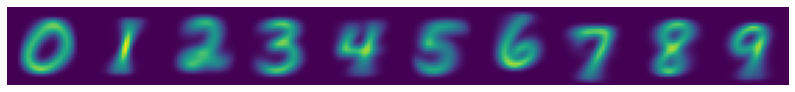

In [8]:
from model_baseline_average import BaselineAverage

evaluate(BaselineAverage(F.mse_loss))